In [1]:
#Load the data
import pandas as pd
import numpy as np
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv(filename, names=names)

In [2]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Perform EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.shape

(768, 9)

In [6]:
df.isnull().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

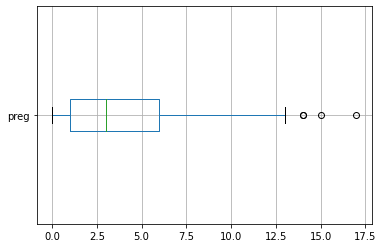

In [8]:
df.boxplot(column=['preg'],vert=False)

<AxesSubplot:>

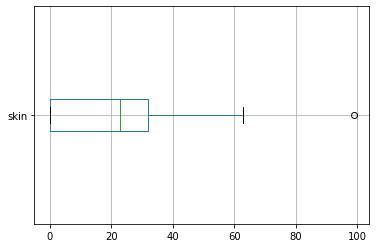

In [9]:
df.boxplot(column=['skin'],vert=False)

In [10]:
df.duplicated().sum()

0

In [11]:
df.corr()

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [12]:
array=df.values
X=array[:,0:8]
Y=array[:,8]

In [13]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
data=std_scaler.fit_transform(X)

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=30)

In [15]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((576, 8), (192, 8), (576,), (192,))

In [16]:
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix

### using linear kernel

In [65]:
model=LinearSVC(max_iter=1501,random_state=70) #LinearSVC(penalty='l2', loss='squared_hinge', *, dual=True, tol=0.0001, C=1.0, 
            # multi_class='ovr',fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)*100
print("Accuracy = ",acc)
confusion_matrix(y_test,y_pred)

Accuracy =  77.08333333333334


D:\anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


array([[125,   5],
       [ 39,  23]], dtype=int64)

### using RBF kernel

In [55]:
#Build a model
model1=SVC(C=0.3,gamma=0.00003,kernel='rbf')  # default='rbf' kernal  and default C=1 (panalty) 
model1.fit(x_train,y_train)

SVC(C=0.3, gamma=3e-05)

 gamma is Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
 
if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma, here 1/(8*X.var())=3.668482165520633e-05

if ‘auto’, uses 1 / n_features.=1/8=0.125

In [56]:
y_pred=model1.predict(x_test)
acc=accuracy_score(y_test,y_pred)*100
print("Accuracy = ",acc)
confusion_matrix(y_test,y_pred)

Accuracy =  80.20833333333334


array([[121,   9],
       [ 29,  33]], dtype=int64)

### using poly kernel

In [39]:
model2=SVC(C=0.2,gamma=0.00003,kernel='poly')
model2.fit(x_train,y_train)
y_pred=model2.predict(x_test)
acc=accuracy_score(y_test,y_pred)*100
print("Accuracy = ",acc)
confusion_matrix(y_test,y_pred)

Accuracy =  80.20833333333334


array([[124,   6],
       [ 32,  30]], dtype=int64)

### using sigmoid kernel

In [108]:
model3=SVC(C=0.87,gamma=0.0003,kernel='sigmoid')
model3.fit(x_train,y_train)
y_pred=model3.predict(x_test)
acc=accuracy_score(y_test,y_pred)*100
print("Accuracy = ",acc)
confusion_matrix(y_test,y_pred)

Accuracy =  66.66666666666666


array([[125,   5],
       [ 59,   3]], dtype=int64)

### Grid Search CV

In [128]:
clf = SVC()  #clf.get_params().keys()
#param_grid = [{'kernel':['poly'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
param_grid = [{'kernel':['rbf'],'gamma':[15,5,0.5,0.005,0.0005,0.00005],'C':[0.2,1,0.5,0.1,0.001,0.2] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [0.2, 1, 0.5, 0.1, 0.001, 0.2],
                          'gamma': [15, 5, 0.5, 0.005, 0.0005, 5e-05],
                          'kernel': ['rbf']}])

In [129]:
gsv.best_params_ , gsv.best_score_ 

({'C': 0.5, 'gamma': 0.0005, 'kernel': 'rbf'}, 0.7501209921355112)